In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
with open('/Users/ishareef7/Springboard/Capstone1/Datasets/recs.pickle','rb') as handle:
    recs = pickle.load(handle)

In [3]:
with open('/Users/ishareef7/Springboard/Capstone1/Datasets/data_info.pickle','rb') as handle:
    data_info = pickle.load(handle)

In [4]:
with open('/Users/ishareef7/Springboard/Capstone1/Datasets/variable_map.pickle','rb') as handle:
    var_map = pickle.load(handle)

In [5]:
var_map['TYPEHUQ']

{'1': 'Mobile home',
 '2': 'Single-family detached house ',
 '3': 'Single-family attached house',
 '4': 'Apartment in a building with 2 to 4 units',
 '5': 'Apartment in a building with 5 or more units'}

# Q: How many of each household type are in the dataset?

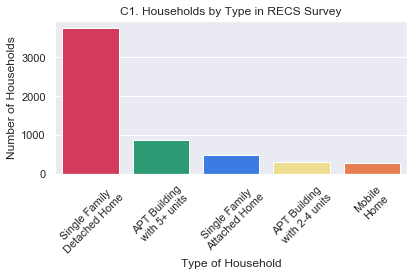

In [6]:
sns.set(palette = 'muted', style = 'darkgrid')

c1 = sns.countplot(x = 'TYPEHUQ', data = recs , order = recs['TYPEHUQ'].value_counts().index,
              palette = sns.crayon_palette(['Red','Green', 'Blue', 'Yellow', 'Orange']))
_ = c1.set( xlabel = 'Type of Household', ylabel = 'Number of Households')
_ = c1.set(xticklabels= ['Single Family\nDetached Home','APT Building\nwith 5+ units', 
                     'Single Family\nAttached Home','APT Building\n with 2-4 units','Mobile\nHome'])
_ = plt.title('C1. Households by Type in RECS Survey')
_ = plt.xticks(rotation=45)
_ = plt.tight_layout()
_ = c1.get_figure().savefig('c1.jpg')

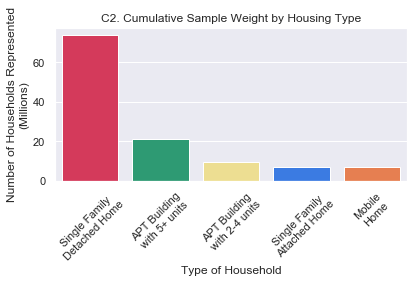

In [7]:
by_htype = recs.groupby('TYPEHUQ')
c2 = sns.barplot(x = by_htype.sum().index, y = 'NWEIGHT', data = by_htype.sum().apply(lambda x: x/1e6) , 
              order = by_htype.sum().NWEIGHT.sort_values(ascending = False).index,
              palette = sns.crayon_palette(['Red','Green', 'Yellow', 'Blue', 'Orange']))

_ = c2.set( xlabel = 'Type of Household', ylabel = 'Number of Households Represented\n(Millions)')
_ = c2.set(xticklabels= ['Single Family\nDetached Home','APT Building\nwith 5+ units', 
                     'APT Building\n with 2-4 units','Single Family\nAttached Home','Mobile\nHome'])
_ = plt.title('C2. Cumulative Sample Weight by Housing Type')
_ = plt.xticks(rotation=45)
_ = plt.tight_layout()
_ = c2.get_figure().savefig('c2.jpg')

In [8]:
recs['TYPEHUQ'].value_counts()

2.0    3752
5.0     858
3.0     479
4.0     311
1.0     286
Name: TYPEHUQ, dtype: int64

In [9]:
by_htype.sum().NWEIGHT

TYPEHUQ
1.0    6.787043e+06
2.0    7.387104e+07
3.0    7.010132e+06
4.0    9.392242e+06
5.0    2.114779e+07
Name: NWEIGHT, dtype: float64

# Insights:
The majority of households in the dataset are single family detached homes as shown in figure C1. The amount of oberservations for each household type are roughly related to the cumulative weights of their observations as shown when comparing figure C1 and C2.

We can see that over 70 million Americans that are represented in this survey live in singlefamily detached homes.

It makes logical sense that the type of household would play a factor into how much energy it will consume. This intuition needs to be verfied and it will be useful to know energy consumption differes across household types.

# Q: How is total energy consumption distributed across housing types?

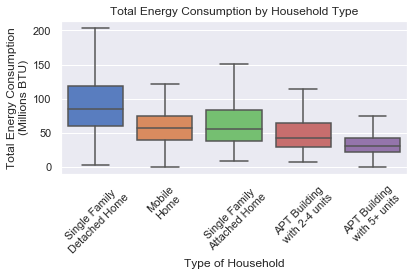

In [10]:
scaled_btu = recs.loc[:,['MONEYPY','TYPEHUQ', 'TOTALBTU','REGIONC', 'NWEIGHT','TOTSQFT_EN']]
scaled_btu['TOTALBTU'] = scaled_btu['TOTALBTU'].apply(lambda x: x/1e3)

_ = c3 = sns.boxplot(x = 'TYPEHUQ', y = 'TOTALBTU', data =  scaled_btu , showfliers= False,
                           order = by_htype.TOTALBTU.median().sort_values(ascending = False).index )
_ = c3.set(xticklabels= ['Single Family\nDetached Home','Mobile\nHome','Single Family\nAttached Home',
                     'APT Building\n with 2-4 units', 'APT Building\nwith 5+ units'])
_ = c3.set( xlabel = 'Type of Household', ylabel = 'Total Energy Consumption\n(Millions BTU)')
_ = plt.title('Total Energy Consumption by Household Type')
_ = plt.xticks(rotation=45)
_ = plt.tight_layout()
_ = c3.get_figure().savefig('c3b.jpg')

In [11]:
by_htype.TOTALBTU.median().sort_values()

TYPEHUQ
5.0    30291.0735
4.0    42284.0370
3.0    55207.8310
1.0    57397.5070
2.0    85530.5110
Name: TOTALBTU, dtype: float64

In [12]:
recs.groupby('TYPEHUQ').describe().TOTALBTU

,count,mean,std,min,25%,50%,75%,max
TYPEHUQ,,,,,,,,
1.0,286.0,58969.503437,27046.911067,201.574,39727.23025,57397.5070,74247.77925,140782.656
2.0,3752.0,93258.435613,46623.632212,2180.268,59625.14350,85530.5110,118097.47975,490187.407
3.0,479.0,64215.563587,37070.764391,8525.377,37904.17000,55207.8310,83201.84950,334798.716
4.0,311.0,50262.126900,29933.353214,6724.610,29869.92900,42284.0370,63877.85700,178549.305
5.0,858.0,33532.236840,16648.589521,372.442,21432.05925,30291.0735,42651.34550,105773.396


In [13]:
mob = scaled_btu[scaled_btu['TYPEHUQ'] == 1]
sfd = scaled_btu[scaled_btu['TYPEHUQ'] == 2]
sfa = scaled_btu[scaled_btu['TYPEHUQ'] == 3]
apt2_4 = scaled_btu[scaled_btu['TYPEHUQ'] == 4]
apt5 = scaled_btu[scaled_btu['TYPEHUQ'] == 5]

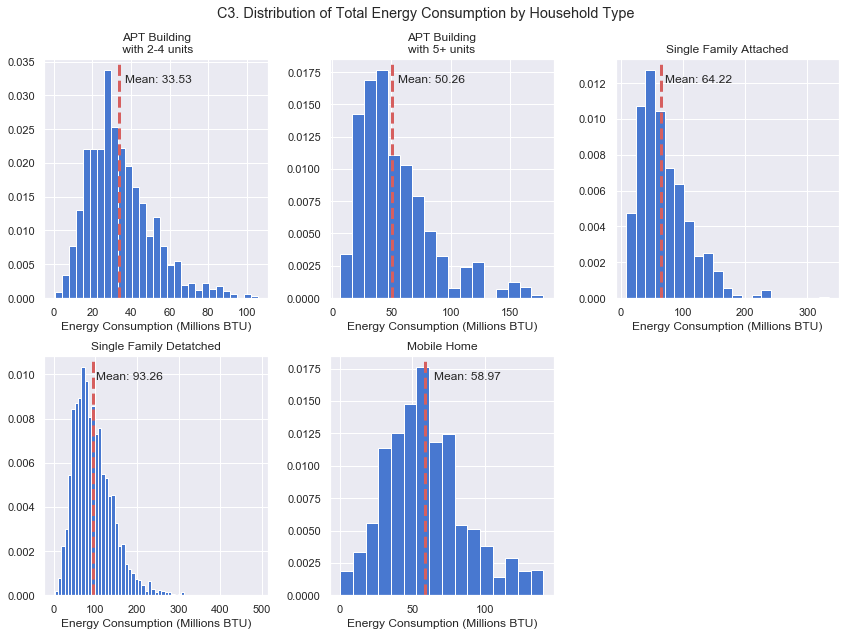

In [14]:
f, axes = plt.subplots(2, 3, figsize=(12, 9))
f.delaxes(axes[1,2])

types = [mob, sfd, sfa, apt2_4, apt5]
titles = ['Mobile Home','Single Family Detatched','Single Family Attached','APT Building\nwith 5+ units', 
                     'APT Building\n with 2-4 units']

for ax in f.get_axes():
    df = types.pop()
    ax.hist(x = df['TOTALBTU'], density = True, weights = df['NWEIGHT'], bins= int(np.sqrt(len(df))))
    ax.set_title(titles.pop())
    ax.axvline(df['TOTALBTU'].mean(), color='r', linestyle='dashed', linewidth=3)
    _, max_ = ax.get_ylim()
    ax.text(df['TOTALBTU'].mean() + df['TOTALBTU'].mean()/10, max_ - max_/10, 
            'Mean: {:.2f}'.format(df['TOTALBTU'].mean()))
    ax.set_xlabel('Energy Consumption (Millions BTU)')
_ = f.suptitle('C3. Distribution of Total Energy Consumption by Household Type')
_ = f.tight_layout()
_ = f.subplots_adjust(top=.9)
_ = f.savefig('c3a.jpg')

# Insights:
According to the plot and table above, Single family Detached households consume significantly more energy than other household types. The energy consumption of these households also have a significantly larger variance.

As shown in Figure C3, the distribution of energy consumption for each household type is positively skewed, with the exception of mobiles homes which have a more symmetric shape.

On average, Single family detached home consumes over twice as much as apartments in buildings with 2-4 units and apartments in buildings with 5+ units. It is surprising to see that mobile homes have a higher mean total energy consumption than apartments, some additional investigation may be necessary to determine the exact cause of this.

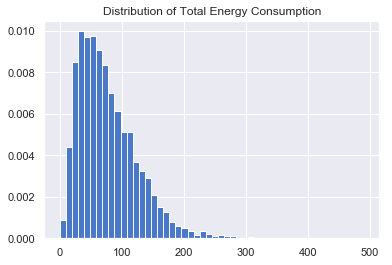

In [15]:
hist = scaled_btu.hist(column = 'TOTALBTU',density = True, bins = 50, 
                       weights = recs['NWEIGHT'])
_ = plt.title('Distribution of Total Energy Consumption')

# Q: How is total energy consumption related to household size?

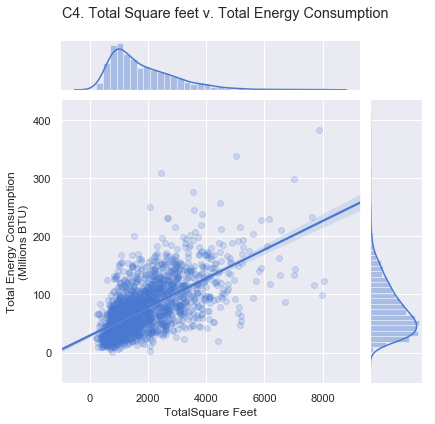

In [16]:
c4 = sns.jointplot(x = 'TOTSQFT_EN', y = 'TOTALBTU', kind = 'reg', data = scaled_btu , scatter_kws = {'alpha':0.2})
_ = c4.set_axis_labels('TotalSquare Feet','Total Energy Consumption\n(Millions BTU)')
_ = c4.fig.subplots_adjust(top=0.9)
_ = c4.fig.suptitle('C4. Total Square feet v. Total Energy Consumption')
_ = c4.savefig('c4.jpg')

In [17]:
r = recs[recs['TOTHSQFT'] > 0]
corr_mat = r.corr()
corr_mat['TOTALBTU'].sort_values().dropna().tail(10)

BEDROOMS      0.513488
CELLAR        0.532189
WINDOWS       0.554348
TOTHSQFT      0.556970
TOTROOMS      0.561312
TOTSQFT_EN    0.630989
DOLLARNG      0.648143
BTUNG         0.716403
TOTALDOL      0.774974
TOTALBTU      1.000000
Name: TOTALBTU, dtype: float64

# Insights:
The scatter plot above shows the relationship between total square feet in the household and total energy consumption.There appears to a moderate positive correlation between total heated square feet and energy consumption. In fact, these two variables have a pairwise correlation coefficient of .64. Total heated square feet in a household and total energy consumption have a correlation coefficient of .58. The correlation is not very strong, however, total square feet and total heated square feet have the highest correlation to total energy consumption of any numeric household characteristic.  

# Q: How does total energy consumption vary across regions?

In [27]:
housing_slice = recs[recs['TOTSQFT_EN'] > 0]
housing_slice.loc[:,'TOTALBTU'] = housing_slice.loc[:,'TOTALBTU'].apply(lambda x: x/1e3)

In [19]:
northeast = scaled_btu[scaled_btu['REGIONC'] == 1]
midwest = scaled_btu[scaled_btu['REGIONC'] == 2]
south = scaled_btu[scaled_btu['REGIONC'] == 3]
west = scaled_btu[scaled_btu['REGIONC'] == 4]

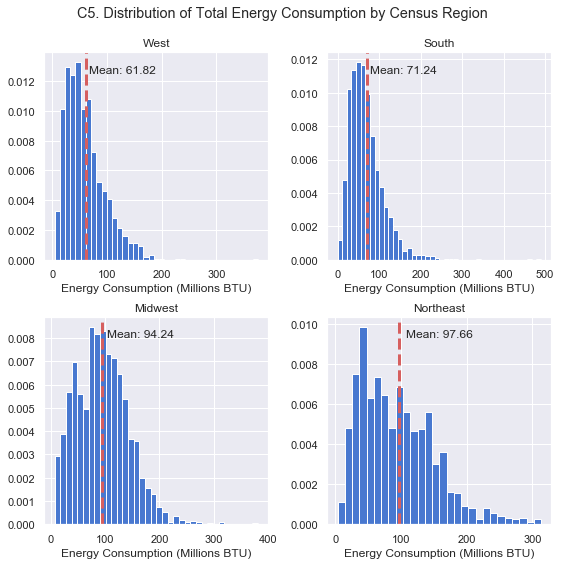

In [20]:
_ = f, axes = plt.subplots(2, 2, figsize=(8, 8))
_ = regions = [northeast,midwest,south,west]
_ = titles = ['Northeast','Midwest','South','West']

for row in axes:
    for col in row:
        df = regions.pop()
        col.hist(x = df['TOTALBTU'], density = True, weights = df['NWEIGHT'], bins= int(np.sqrt(len(df))))
        col.set_title(titles.pop())
        col.axvline(df['TOTALBTU'].mean(), color='r', linestyle='dashed', linewidth=3)
        _, max_ = col.get_ylim()
        col.text(df['TOTALBTU'].mean() + df['TOTALBTU'].mean()/10, max_ - max_/10, 
            'Mean: {:.2f}'.format(df['TOTALBTU'].mean()))
        col.set_xlabel('Energy Consumption (Millions BTU)')
_ = f.suptitle('C5. Distribution of Total Energy Consumption by Census Region')
_ = f.tight_layout()
_ = f.subplots_adjust(top=.9)
_ = f.savefig('c5.jpg')

# Insights

According to the figure shown above, there appears to be a significant difference in the means of the distributions of energy consumption across regions. All four regions have positively skewed distribution. The distributions of energy consumption in the Northeast and Midwest appear to be similar however the the distributions of the South and West have significatly lower means.

This may suggest that total energy consumption is closely related to the region that a household is in and that households in colder climates consume more energy than those in warmer climates. Further investigation should be done to quantify the significance of the difference in distribution and how other variable related to region or climate affect energy consumption.

# Q: How does household income relate to total energy consumption?

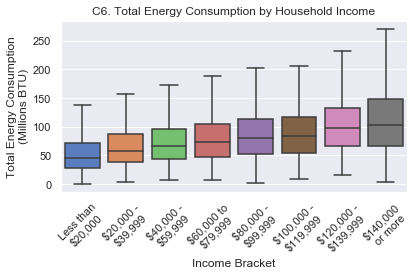

In [21]:
c6 = sns.boxplot(x = 'MONEYPY', y = 'TOTALBTU', data = scaled_btu, showfliers= False)
_ = c6.set(xticklabels= ['Less than\n$20,000','\$20,000 -\n\$39,999','\$40,000 -\n\$59,999',
                     '\$60,000 to\n\$79,999', '\$80,000 -\n\$99,999', '\$100,000 -\n\$119,999', 
                     '\$120,000 -\n\$139,999', '\$140,000\nor more'])
_ = c6.set( xlabel = 'Income Bracket', ylabel = 'Total Energy Consumption\n(Millions BTU)')
_ = plt.title('C6. Total Energy Consumption by Household Income')
_ = plt.xticks(rotation=45)
_ = plt.tight_layout()
_ = c6.get_figure().savefig('c6.jpg')

# Insights
According to the plot above, total energy consumption increases slightly with household income. There is little increase in energy consumption between adjacent income brackets, however the the gradual increase in consumption across all brackets results in significant increases in consumption bewteen non-adjacent brackets.

The distribution of energy consumption within income brackets also becomes more spread in higher income brackets

# Q: What is the distrubution of total electronics in the household and how does the amount of electronics change across income levels?

In [22]:
electronic_freq = ['TVCOLOR', 'CABLESAT','COMBODVR','SEPDVR','PLAYSTA','DVD','VCR','INTSTREAM',
                   'TVAUDIOSYS','DESKTOP','NUMLAPTOP','NUMTABLET','ELPERIPH','NUMSMPHONE', 'CELLPHONE']
electronic_use = recs.loc[:,electronic_freq]

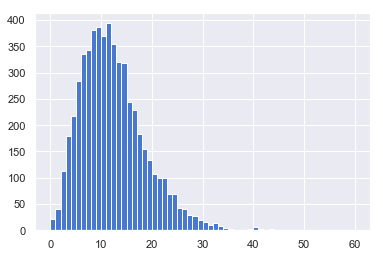

In [23]:
recs['TOTALELECUSE'] = electronic_use[electronic_use >=0].sum(1)
recs['TOTALELECUSE'].hist(bins=60)

In [24]:
recs.groupby('MONEYPY').describe().TOTALELECUSE

,count,mean,std,min,25%,50%,75%,max
MONEYPY,,,,,,,,
1.0,896.0,7.664062,4.693259,0.0,4.0,7.0,10.0,33.0
2.0,1150.0,9.666957,5.296225,0.0,6.0,9.0,13.0,52.0
3.0,818.0,11.429095,5.252777,1.0,8.0,11.0,14.0,33.0
4.0,693.0,13.072150,6.196026,0.0,9.0,12.0,16.0,60.0
5.0,445.0,13.755056,5.466998,0.0,10.0,13.0,17.0,33.0
6.0,381.0,14.745407,5.781164,1.0,11.0,14.0,18.0,35.0
7.0,251.0,16.163347,6.255974,0.0,12.0,15.0,21.0,41.0
8.0,530.0,17.460377,7.032152,2.0,12.0,16.0,22.0,43.0


In [25]:
recs['TOTALELECUSE'].mean()

11.82219486457967

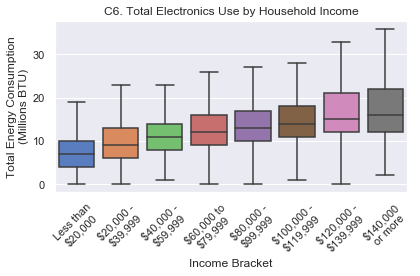

In [26]:
c7 = sns.boxplot(x = 'MONEYPY', y = 'TOTALELECUSE', data = recs, showfliers = False)
_ = c7.set(xticklabels= ['Less than\n$20,000','\$20,000 -\n\$39,999','\$40,000 -\n\$59,999',
                     '\$60,000 to\n\$79,999', '\$80,000 -\n\$99,999', '\$100,000 -\n\$119,999', 
                     '\$120,000 -\n\$139,999', '\$140,000\nor more'])
_ = c7.set( xlabel = 'Income Bracket', ylabel = 'Total Energy Consumption\n(Millions BTU)')
_ = plt.title('C6. Total Electronics Use by Household Income')
_ = plt.xticks(rotation=45)
_ = plt.tight_layout()
_ = c7.get_figure().savefig('c7.jpg')

# Insights
The average total of amount of electronics per household is approx. 12. According to the plot above, the amount of electronics in a household does increase slightly in households in higher income brackets. The spread of of total electronics also appears to get larger in households in higher income brackets.